I was encountering memory issues (that included handling large datasets and visualizing the results) with Agglomerative Clustering, so I tried sample approach to mitigate this. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Ensure plots are displayed inline
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load the main dataset
data_path = 'data2.csv'  # Adjust the path if necessary
data = pd.read_csv(data_path)
data = pd.get_dummies(data, columns=[])

# Load your selected columns from the specified path
selected_columns_path = 'AirEau_features_lag15.csv'  # Adjust the path if necessary
selected_columns_df = pd.read_csv(selected_columns_path)

# Select only the feature column
selected_columns = selected_columns_df['Feature'].tolist()

# Select the data for analysis
data_selected = data[selected_columns]

# Check if the first column is date and time, and drop it if necessary
if 'Date' in data_selected.columns or 'Time' in data_selected.columns:
    data_selected = data_selected.drop(columns=['Date', 'Time'], errors='ignore')

In [4]:
# Preprocess the data
X = data_selected.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine the maximum allowable number of PCA components
max_components = min(X_scaled.shape)

# Perform PCA
n_components = min(40, max_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Subsampling the Dataset:

Reduce the size of the dataset to fit in memory by using a fraction of the data (sample_fraction).

In [6]:
# Subsample the data for clustering if necessary
sample_fraction = 0.1  # Adjust as needed
X_pca_sampled = X_pca[:int(len(X_pca) * sample_fraction)]

In [7]:
# Perform Agglomerative clustering on the subsampled data
n_clusters = 3  # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
y_agg = agglomerative.fit_predict(X_pca_sampled)

In [8]:
# Calculate Silhouette Score
silhouette_avg_agg = silhouette_score(X_pca_sampled, y_agg)
print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg:.2f}')

Agglomerative Clustering Silhouette Score: 0.68


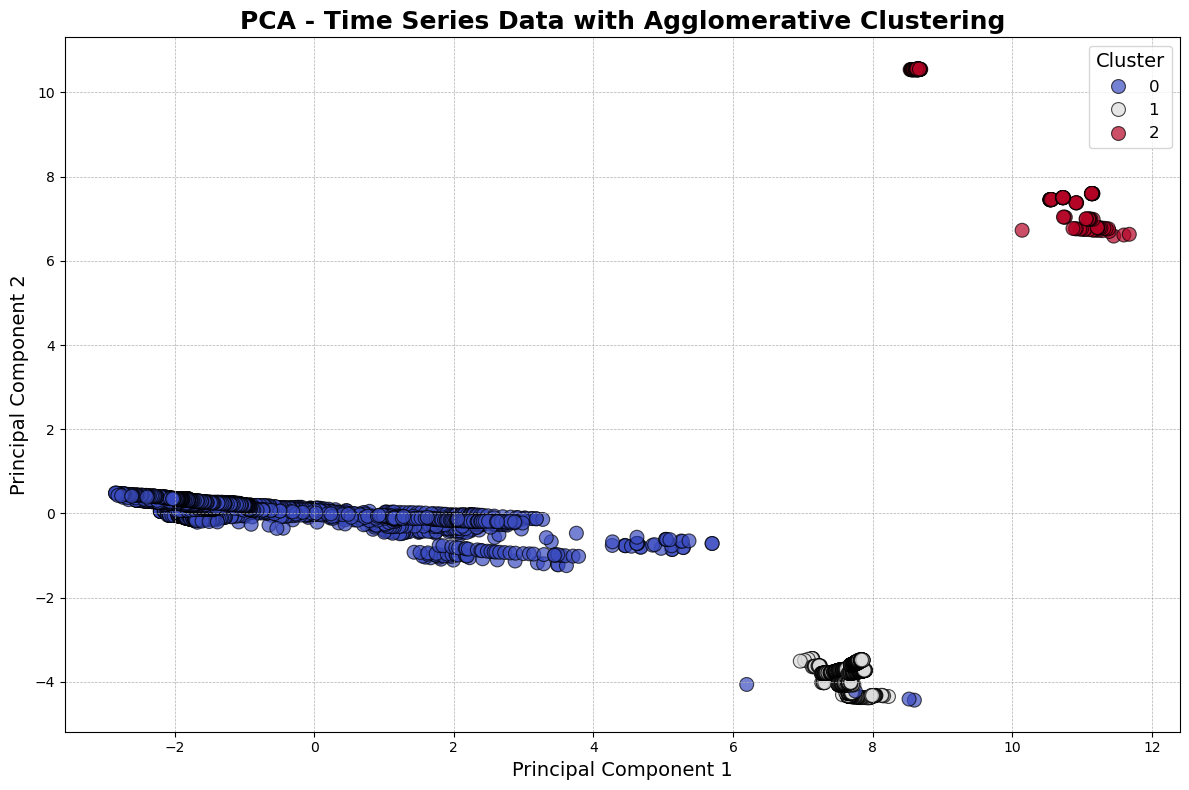

In [9]:
# Visualize clustering results in 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca_sampled[:, 0], y=X_pca_sampled[:, 1], hue=y_agg, palette='coolwarm', s=100, alpha=0.7, edgecolor='k')
plt.title('PCA - Time Series Data with Agglomerative Clustering', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

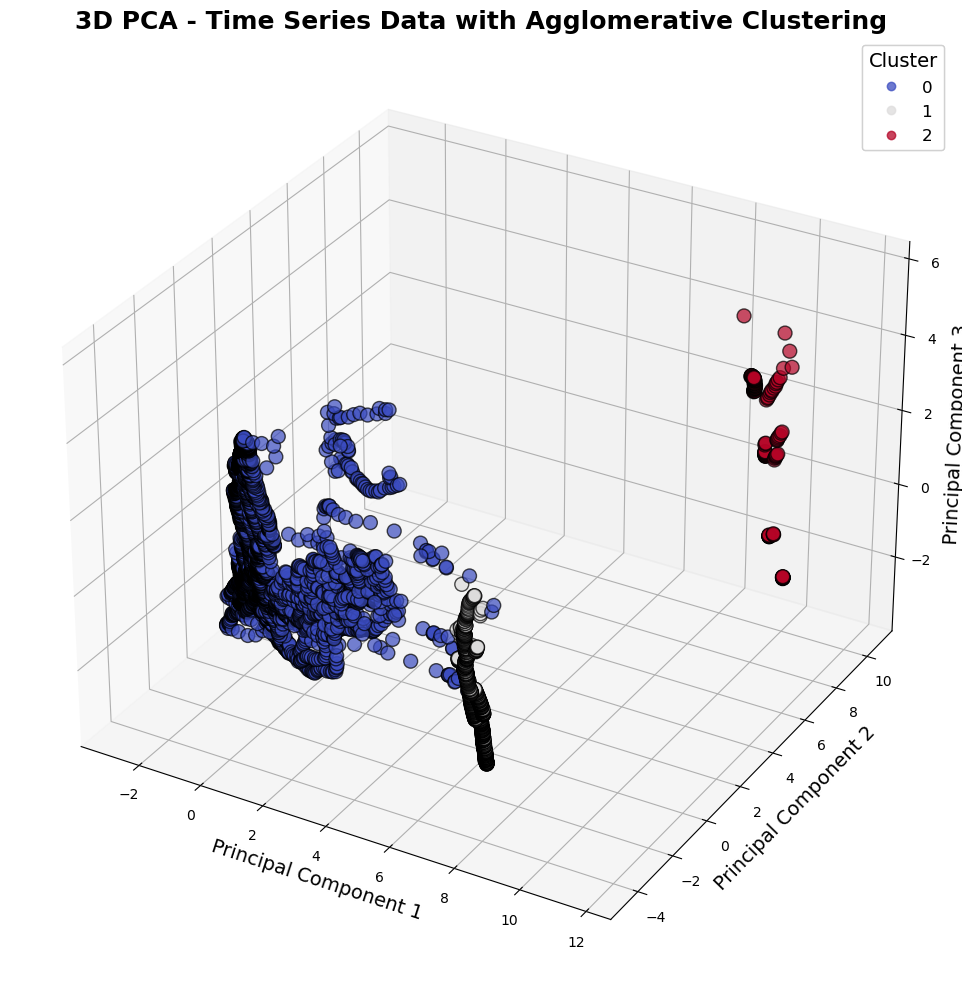

In [10]:

# Visualize clustering results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], X_pca_sampled[:, 2], c=y_agg, cmap='coolwarm', s=100, alpha=0.7, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", fontsize=12, title_fontsize=14)
ax.add_artist(legend1)
ax.set_title('3D PCA - Time Series Data with Agglomerative Clustering', fontsize=18, weight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
